In this exercise, we will train our first feed-forward neural network with one hidden layer. We will reuse previous data but now, our hypothesis is not a polynomial any more but a one-hidden-layer neural network. We know that this is possible thanks to [universal approximation theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem).

In [153]:
x_data = [-1.5, -0.5, 0.5, 1.5]
y_data = [4, 10, 9, 8.5]

The neural net is defined by:
$$ z = x W_1 + b_1 $$
$$ a = \tanh(z1) $$
$$ y = a W_2 + b_2 $$
$$ \ell = \sum(y - y_\mathrm{gold})^2 $$

Let's setup an environment first

In [154]:
import tensorflow as tf
import numpy as np
sess = tf.InteractiveSession()
x = tf.placeholder("float")
hidden_size = 10
W1 = tf.Variable(np.random.rand(hidden_size), dtype="float")
b1 = tf.Variable(np.zeros(hidden_size), dtype="float")
W2 = tf.Variable(np.random.rand(hidden_size), dtype="float")
b2 = tf.Variable(0.0, dtype="float")

%pylab inline
import matplotlib.pyplot as plt 
def plot_curve(sess, x, y):
    x_val = np.linspace(-2, 2, 20)
    y_val = sess.run(y, feed_dict={x: x_val})
    plt.plot(x_val, y_val)          # line plot
    plt.plot(x_data, y_data, 'o')
    plt.show()           # <-- shows the plot (not needed with pylab)         

Populating the interactive namespace from numpy and matplotlib


Start with the net input of the hidden layer:

In [155]:
z = tf.reshape(x, [-1, 1]) * W1 + b1
z

<tf.Tensor 'add_25:0' shape=(?, 10) dtype=float32>

Apply an activiation funciton to get the output of the hidden layer. You can try to replace `tanh` with other activation funciton such as `sigmoid` or rectified linear.

In [156]:
a = tf.tanh(z)
a

<tf.Tensor 'Tanh_11:0' shape=(?, 10) dtype=float32>

The output of the net is simply a linear combination of hidden activations:

In [157]:
y = tf.reshape(tf.matmul(a, tf.reshape(W2, [-1, 1])) + b2, [-1])
y

<tf.Tensor 'Reshape_33:0' shape=(?,) dtype=float32>

At first, the curve looks quite arbitrary:

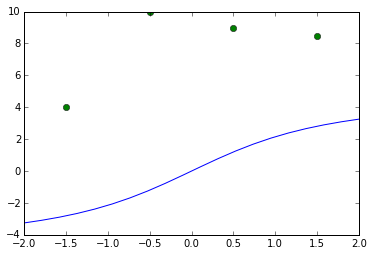

In [158]:
init_op = tf.initialize_all_variables()
sess.run(init_op)
plot_curve(sess, x, y)

And understandably, the loss is big.

In [159]:
loss = tf.reduce_sum((y - y_data)*(y - y_data))
sess.run(loss, feed_dict={x: x_data})

265.0213

We compute gradients as usual:

In [160]:
dW1, db1, dW2, db2 = tf.gradients(loss, [W1, b1, W2, b2])
alpha = tf.placeholder("float") # learning rate
op_dW1 = tf.assign_sub(W1, alpha*dW1)
op_db1 = tf.assign_sub(b1, alpha*db1)
op_dW2 = tf.assign_sub(W2, alpha*dW2)
op_db2 = tf.assign_sub(b2, alpha*db2)

Observe the curve changes across epochs. You can try to feed in different `alpha` (learning rate), change the hidden size, add more points to the dataset, and so on.

Epoch 1: loss=265.021301


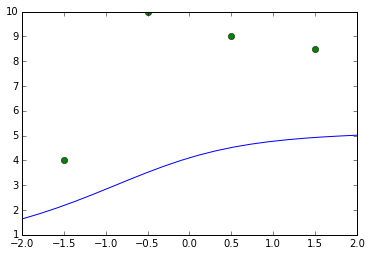

Epoch 2: loss=78.158691


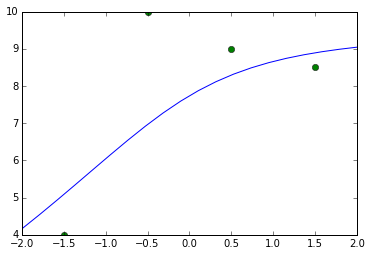

Epoch 3: loss=11.035289


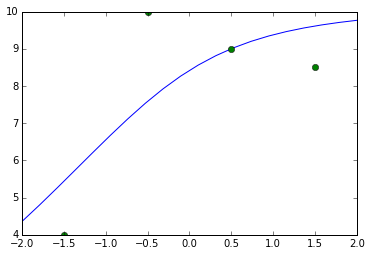

Epoch 4: loss=9.130065


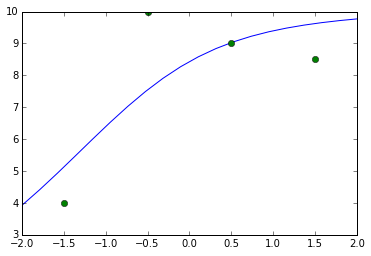

Epoch 5: loss=8.557259


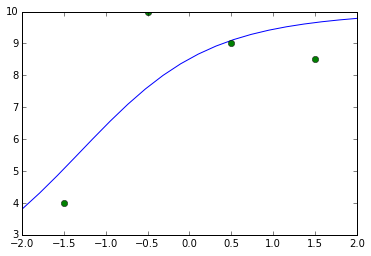

Epoch 6: loss=8.098701


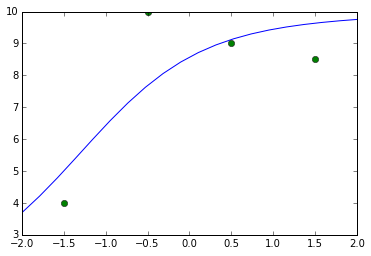

Epoch 7: loss=7.678905


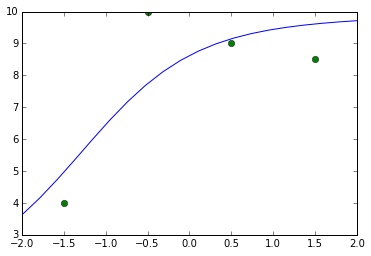

Epoch 8: loss=7.285206


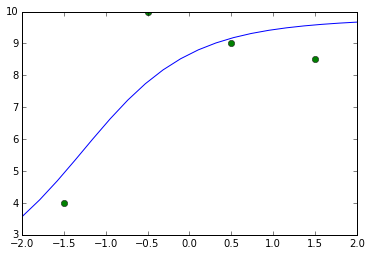

Epoch 9: loss=6.911750


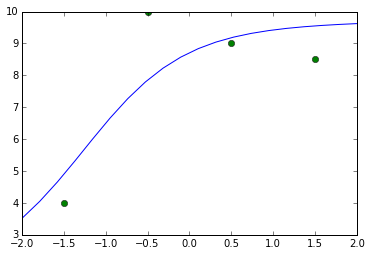

Epoch 10: loss=6.552473


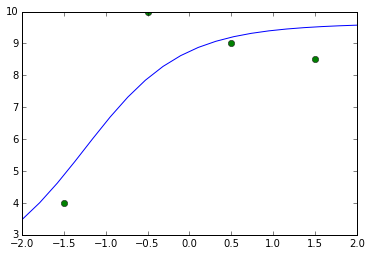

Epoch 11: loss=6.206583


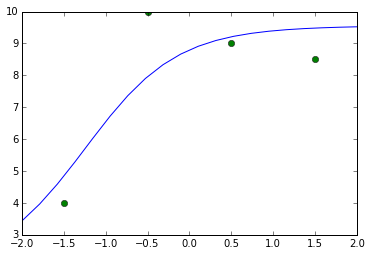

Epoch 12: loss=5.870157


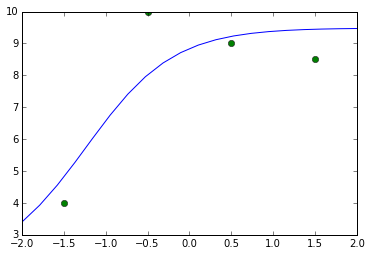

Epoch 13: loss=5.540869


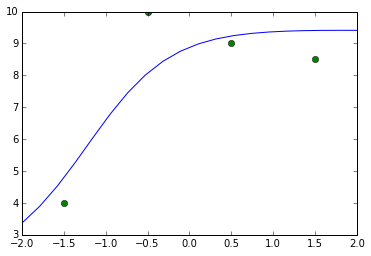

Epoch 14: loss=5.216850


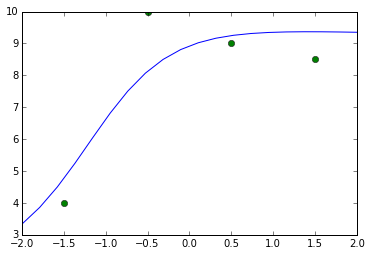

Epoch 15: loss=4.896644


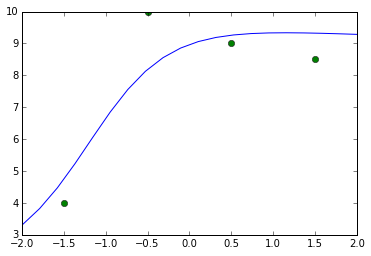

Epoch 16: loss=4.579165


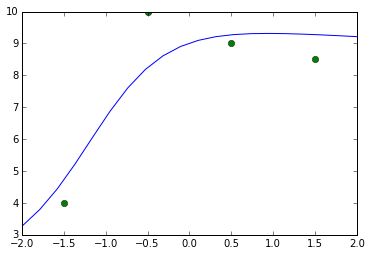

Epoch 17: loss=4.263753


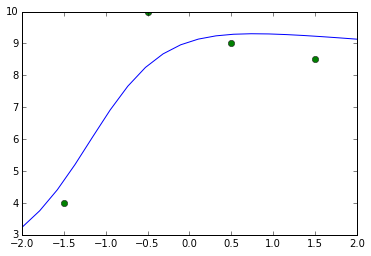

Epoch 18: loss=3.948644


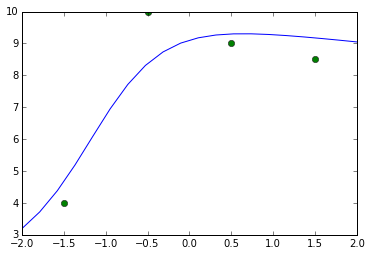

Epoch 19: loss=3.637474


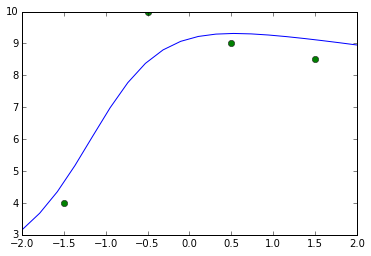

Epoch 20: loss=3.329765


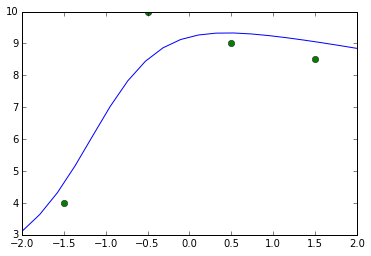

Epoch 21: loss=3.027608


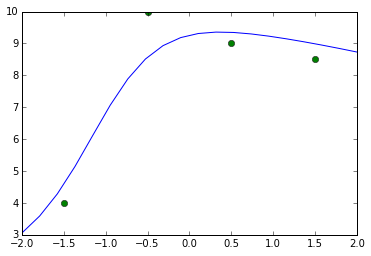

Epoch 22: loss=2.734166


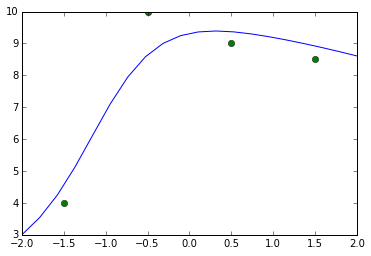

Epoch 23: loss=2.453701


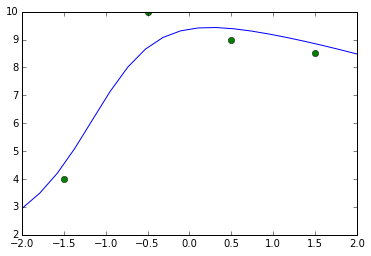

Epoch 24: loss=2.191228


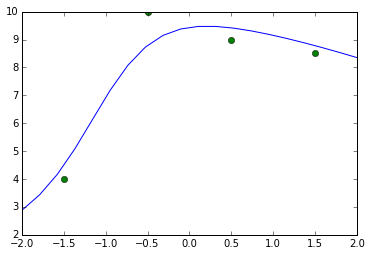

Epoch 25: loss=1.950020


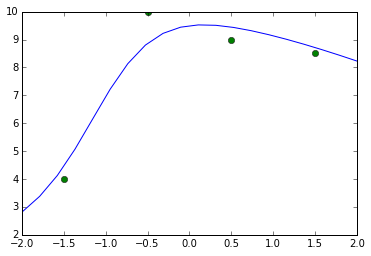

Epoch 26: loss=1.738022


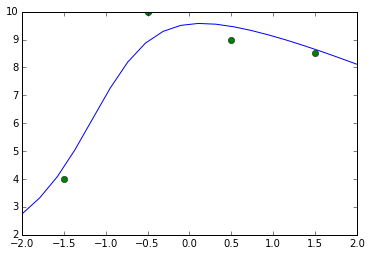

Epoch 27: loss=1.555411


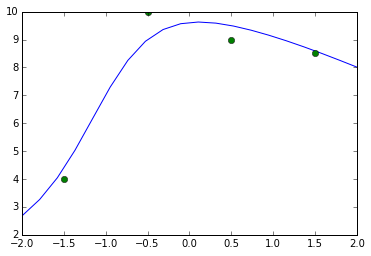

Epoch 28: loss=1.402045


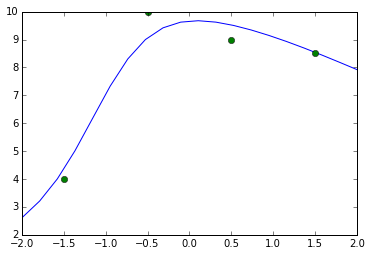

Epoch 29: loss=1.275701


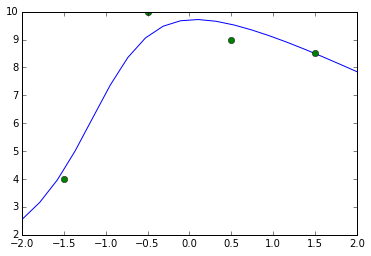

Epoch 30: loss=1.172785


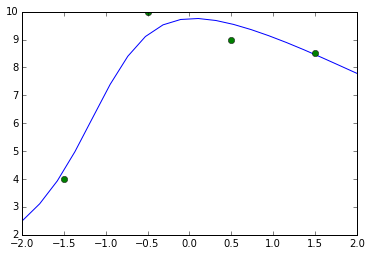

Epoch 31: loss=1.089171


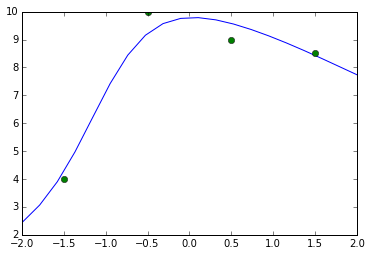

Epoch 32: loss=1.020842


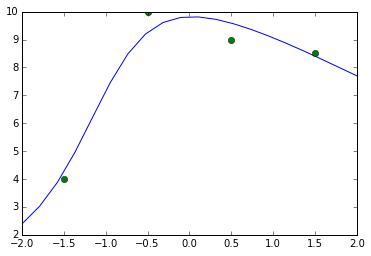

Epoch 33: loss=0.963996


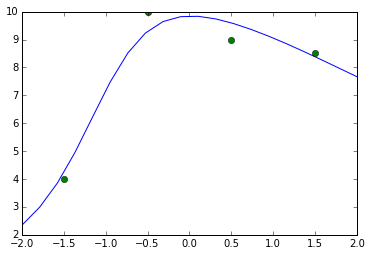

Epoch 34: loss=0.916083


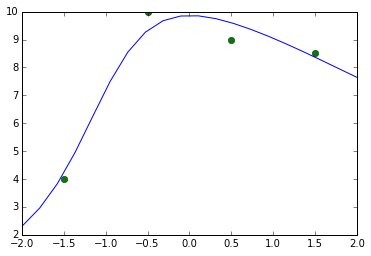

Epoch 35: loss=0.874985


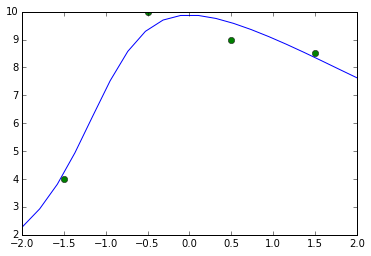

Epoch 36: loss=0.838771


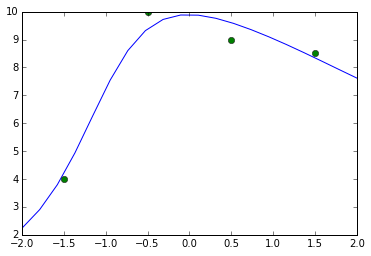

Epoch 37: loss=0.806198


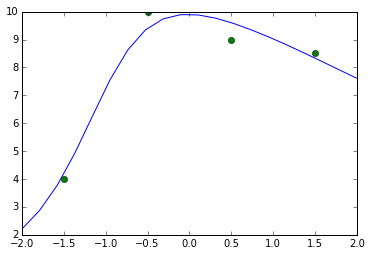

Epoch 38: loss=0.776362


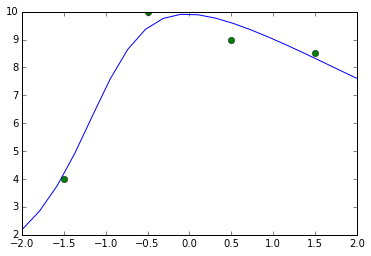

Epoch 39: loss=0.748627


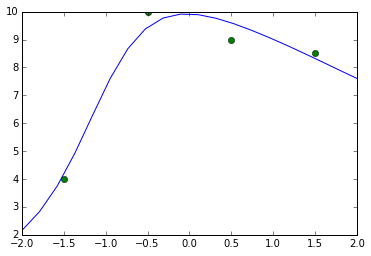

Epoch 40: loss=0.722539


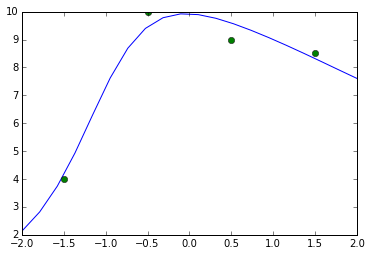

Epoch 41: loss=0.697779


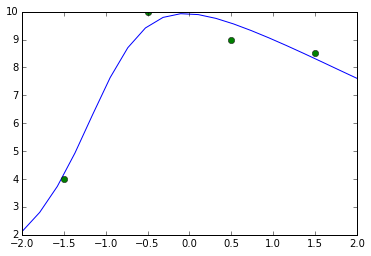

Epoch 42: loss=0.674122


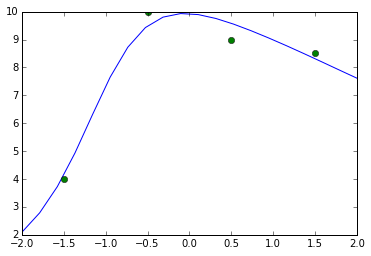

Epoch 43: loss=0.651331


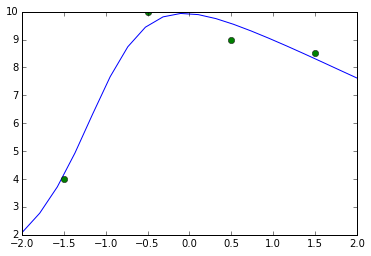

Epoch 44: loss=0.629446


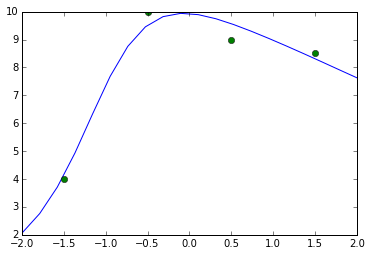

Epoch 45: loss=0.608308


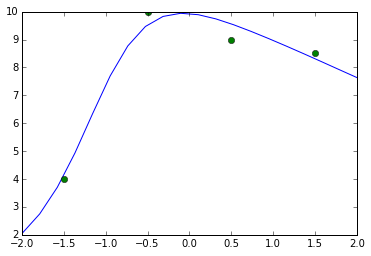

Epoch 46: loss=0.587854


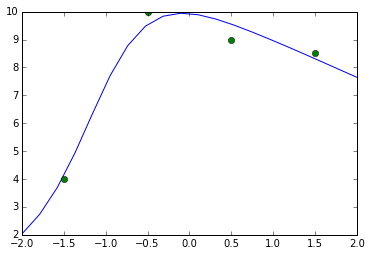

Epoch 47: loss=0.568038


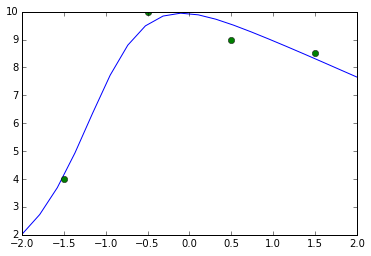

Epoch 48: loss=0.548823


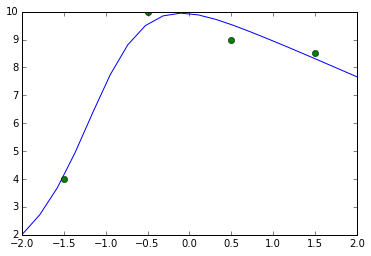

Epoch 49: loss=0.530182


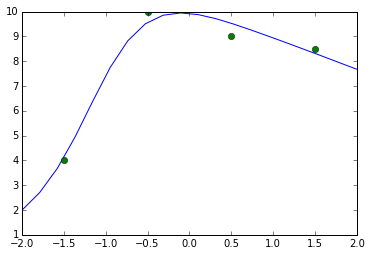

Epoch 50: loss=0.512034


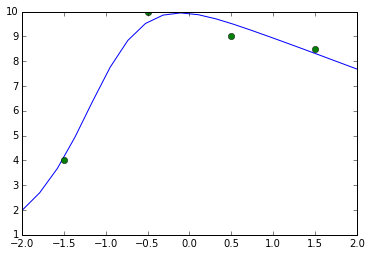

In [161]:
sess.run(init_op)
for i in range(50):
    loss_val = sess.run([loss, op_dW1, op_db1, op_dW2, op_db2], 
                        feed_dict={x: x_data, alpha: 0.025})[0]
    print 'Epoch %d: loss=%f' %(i+1, loss_val)
    plot_curve(sess, x, y)

In [3]:
sess.close()